## **Import Libraries**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Train Data File**

In [30]:
train = pd.read_csv('/content/train_data.txt', sep = ':::', names = ['ID', 'Title', 'Genre', 'Description'],engine = 'python')

In [31]:
train.head()

ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  
0   Listening in to a conversation between his do...  
1   A brother and sister with a past incestuous r...  
2   As the bus empties the students for their fie...  
3   To help their unemployed father make ends mee...  
4   The film's title refers not only to the un-re...

## **Statistical Analysis**

In [32]:
train.describe()

ID
count  54214.000000
mean   27107.500000
std    15650.378084
min        1.000000
25%    13554.250000
50%    27107.500000
75%    40660.750000
max    54214.000000

**Information of the DataSet**

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


**Compute Total Missing Values**

In [34]:
missing_values = []
for col in train.columns:
  missing_values.append(sum(train[col].isnull()))
col = pd.DataFrame(train.columns)
missing_values = pd.DataFrame(missing_values)
result_missing = pd.concat([col, missing_values], axis = 1)
result_missing.columns = ['Columns', 'Total Missing Values']
result_missing

Columns  Total Missing Values
0           ID                     0
1        Title                     0
2        Genre                     0
3  Description                     0

### **Exploratory Data Analysis**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26],
 [Text(0, 0, ' drama '),
  Text(1, 0, ' documentary '),
  Text(2, 0, ' comedy '),
  Text(3, 0, ' short '),
  Text(4, 0, ' horror '),
  Text(5, 0, ' thriller '),
  Text(6, 0, ' action '),
  Text(7, 0, ' western '),
  Text(8, 0, ' reality-tv '),
  Text(9, 0, ' family '),
  Text(10, 0, ' adventure '),
  Text(11, 0, ' music '),
  Text(12, 0, ' romance '),
  Text(13, 0, ' sci-fi '),
  Text(14, 0, ' adult '),
  Text(15, 0, ' crime '),
  Text(16, 0, ' animation '),
  Text(17, 0, ' sport '),
  Text(18, 0, ' talk-show '),
  Text(19, 0, ' fantasy '),
  Text(20, 0, ' mystery '),
  Text(21, 0, ' musical '),
  Text(22, 0, ' biography '),
  Text(23, 0, ' history '),
  Text(24, 0, ' game-show '),
  Text(25, 0, ' news '),
  Text(26, 0, ' war ')])

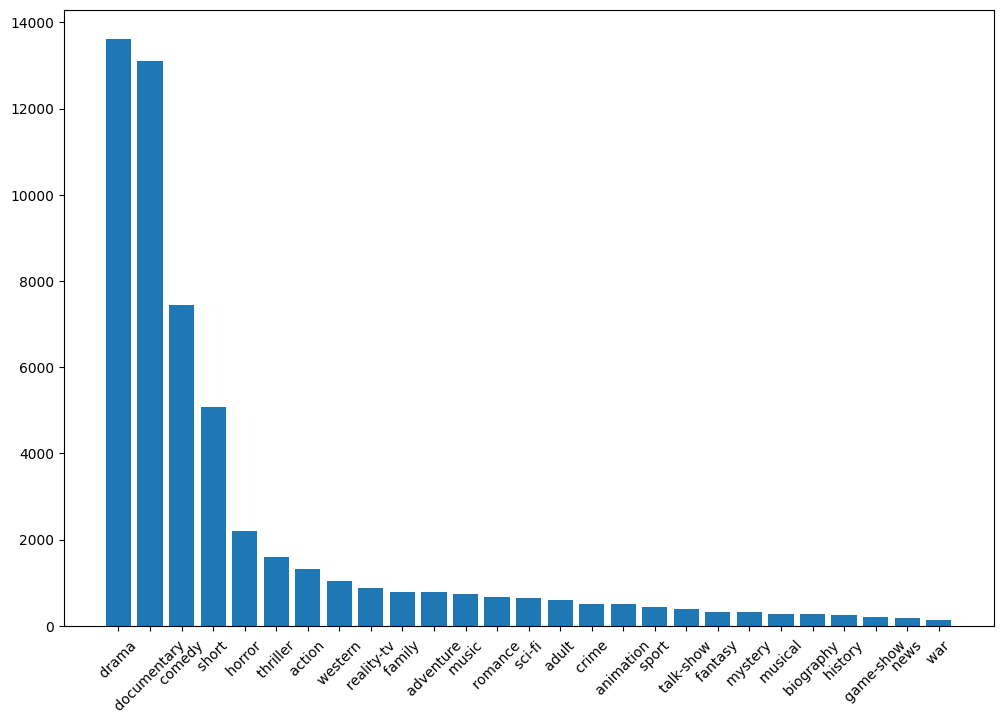

In [35]:
plt.figure(figsize = (12, 8))
plt.bar(x= train['Genre'].value_counts().index, height = train['Genre'].value_counts())
plt.xticks(rotation = 45)

# **Data Preprocessing**

In [40]:
# Data Cleaning

import re
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()
stopwords = set(stopwords.words('english'))
def data_cleaning(data):
  data = data.lower()
  data = re.sub(r'@\S+', '', data)
  data = re.sub(r'http\S+', '', data)
  data = re.sub(r'pic.\S+', '', data)
  data = re.sub(r"[^a-zA-Z+']",' ', data)
  data = re.sub(r'\s+[a-zA-Z]\s+', ' ', data+' ')
  data = "".join([i for i in data if i not in string.punctuation])
  words = nltk.word_tokenize(data)
  stopwords = nltk.corpus.stopwords.words('english')
  data = " ".join([i for i in words if i not in stopwords and len(i) > 2])
  data = re.sub('\s[\s]+', ' ', data).strip()

  return data


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [41]:
# clean_desc column containing the clean data of Description

train['clean_desc'] = train['Description'].apply(data_cleaning)

# **TfidfVectorizer**

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(train['clean_desc'])
y = train['Genre']

# **Model Selection**

# **1. Naive Bayes**

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [44]:
# Prediction predict by naive bayes

prediction_val = nb.predict(x_test)

**Accuracy Score**

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
accuracy_score(y_test, prediction_val)

0.44526422576777647

# **2. Random Forest**

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(x_train, y_train)
rf_prediction_val = rf_model.predict(x_test)

**Accuraccy Score**

In [49]:
accuracy_score(y_test, rf_prediction_val)

0.48907129023333024

# **3. Support Vector Machine**

In [46]:
from sklearn.svm import LinearSVC
svc_model = LinearSVC()
svc_model.fit(x_train, y_train)
svc_prediction_val = svc_model.predict(x_test)

**Accuracy Score**

In [47]:
accuracy_score(y_test, svc_prediction_val)

0.5883980448215439

# **4. Logistic Regression**

In [81]:
from sklearn.linear_model import LogisticRegression
regression = LogisticRegression()
regression.fit(x_train, y_train)
regression_prediction_val = regression.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Accuracy Score**

In [82]:
accuracy_score(y_test, regression_prediction_val)

0.5808355621138062

# **Testing File**

In [67]:
testing = pd.read_csv('/content/test_data_solution.txt',sep = ':::', names = ['ID', 'Title','Genre', 'Description'])

<ipython-input-67-e70b1d070177>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  testing = pd.read_csv('/content/test_data_solution.txt',sep = ':::', names = ['ID', 'Title','Genre', 'Description'])


In [68]:
testing.head()

ID                          Title          Genre  \
0   1          Edgar's Lunch (1998)       thriller    
1   2      La guerra de papá (1977)         comedy    
2   3   Off the Beaten Track (2010)    documentary    
3   4        Meu Amigo Hindu (2015)          drama    
4   5             Er nu zhai (1955)          drama    

                                         Description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

In [69]:
testing = testing.drop('Genre', axis = 1)

In [70]:
testing.head()

ID                          Title  \
0   1          Edgar's Lunch (1998)    
1   2      La guerra de papá (1977)    
2   3   Off the Beaten Track (2010)    
3   4        Meu Amigo Hindu (2015)    
4   5             Er nu zhai (1955)    

                                         Description  
0   L.R. Brane loves his life - his car, his apar...  
1   Spain, March 1964: Quico is a very naughty ch...  
2   One year in the life of Albin and his family ...  
3   His father has died, he hasn't spoken with hi...  
4   Before he was known internationally as a mart...

In [71]:
# Information of the testing dataset

testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   Title        54200 non-null  object
 2   Description  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [72]:
# Apply data cleaning function to testing file

testing['clean_desc'] = testing['Description'].apply(data_cleaning)

In [73]:
# Using TfidfVectorizer to convert text data into vectors

X_test = vectorizer.transform(testing['clean_desc'])

**Naive Bayes Prediction**

In [74]:
test_prediction_nb = nb.predict(X_test)

**Random Forest Preiction**

In [75]:
test_prediction_rf = rf_model.predict(X_test)

**SVM Prediction**

In [76]:
test_prediction_svc = svc_model.predict(X_test)

**Logistic Regression Prediction**

In [83]:
test_prediction_regression = regression.predict(X_test)

In [77]:
test_prediction_nb

array([' drama ', ' drama ', ' documentary ', ..., ' drama ', ' drama ',
       ' documentary '], dtype='<U13')

In [80]:
test_prediction_rf

array([' drama ', ' drama ', ' documentary ', ..., ' drama ', ' drama ',
       ' documentary '], dtype=object)

In [79]:
test_prediction_svc

array([' comedy ', ' drama ', ' documentary ', ..., ' drama ', ' horror ',
       ' drama '], dtype=object)

In [85]:
test_prediction_regression

array([' comedy ', ' drama ', ' documentary ', ..., ' drama ',
       ' documentary ', ' documentary '], dtype=object)

# **Comparing Prediction of each Model**

In [90]:
test_prediction_nb = pd.DataFrame(test_prediction_nb)
test_prediction_rf = pd.DataFrame(test_prediction_rf)
test_prediction_svc = pd.DataFrame(test_prediction_svc)
test_prediction_regression = pd.DataFrame(test_prediction_regression)


In [91]:
result_prediction = pd.concat([test_prediction_nb,test_prediction_rf,test_prediction_svc,test_prediction_regression], axis = 1)

In [92]:
result_prediction.columns = ['Naive Bayes', 'Random Forest', 'SVM', 'Logistic Regression']

In [93]:
result_prediction

Naive Bayes  Random Forest            SVM Logistic Regression
0             drama          drama         comedy              comedy 
1             drama          drama          drama               drama 
2       documentary    documentary    documentary         documentary 
3             drama          drama          drama               drama 
4             drama          drama          drama               drama 
...              ...            ...            ...                 ...
54195         drama          drama         horror               drama 
54196         drama          drama        western               drama 
54197         drama          drama          drama               drama 
54198         drama          drama         horror         documentary 
54199   documentary    documentary          drama         documentary 

[54200 rows x 4 columns]